In [52]:
import sunpy
import sunpy.map
from sunraster.instr.spice import read_spice_l2_fits
import astropy.units as u
import astropy.constants as const
import numpy as np
from astropy.visualization import ImageNormalize, AsinhStretch
import matplotlib.pyplot as plt

In [45]:
saffron_map = sunpy.map.Map('../sav/saffron_results/1017/solo_L2.5_spice-n-ras_20221017T031211_V03_150995346-000/con-06/solo_L2.5_spice-n-ras_20221017T031211_V03_150995346-000_00770.42-ne_8_con-06_time-240809T190610.fits')
saffron_int_map = saffron_map[0]
saffron_vel_map = saffron_map[1]

saffron_vel_data = saffron_vel_map.data


saffron_velmap_data = (saffron_vel_data/np.nanmedian(saffron_vel_data) - 1) *const.c.to_value(u.km/u.s)
saffron_velmap_median = np.nanmedian(saffron_velmap_data[120:650,:], axis=0)
saffron_velmap_median_fit_param = np.polyfit(np.arange(saffron_velmap_median.shape[0]), saffron_velmap_median, 1)
saffron_velmap_data = saffron_velmap_data - np.polyval(saffron_velmap_median_fit_param, np.arange(saffron_velmap_median.shape[0]))[np.newaxis,:]
saffron_velmap = sunpy.map.Map(saffron_velmap_data, saffron_vel_map.meta)



In [35]:
saffron_map = sunpy.map.Map('../sav/saffron_results/1017/solo_L2.5_spice-n-ras_20221017T031211_V03_150995346-000/con-06/solo_L2.5_spice-n-ras_20221017T031211_V03_150995346-000_00770.42-ne_8_con-06_time-240809T190610.fits')
saffron_vel_map = saffron_map[1]

saffron_vel_data = saffron_vel_map.data

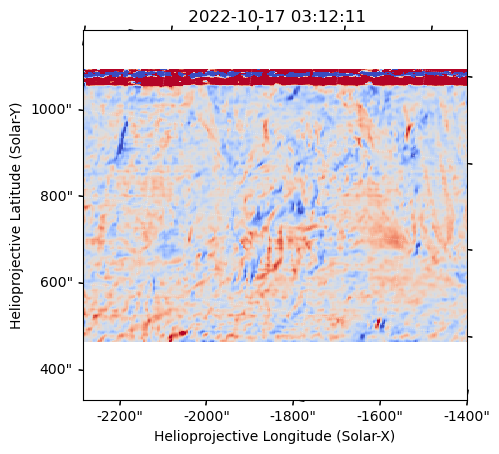

In [50]:
saffron_velmap.plot(norm=ImageNormalize(vmin=-40, vmax=40),
                    aspect=saffron_velmap.meta['cdelt2']/saffron_velmap.meta['cdelt1'],
                    cmap='coolwarm')

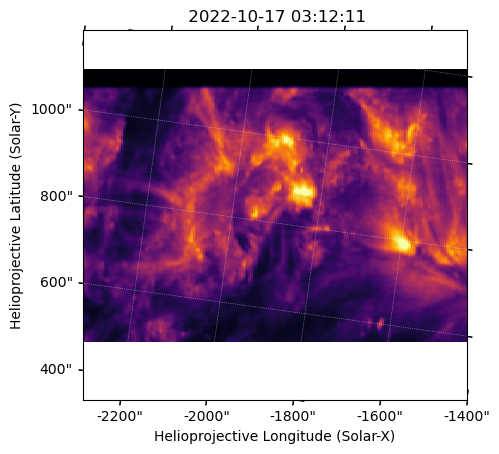

In [53]:
saffron_int_map.plot(aspect=saffron_int_map.meta['cdelt2']/saffron_int_map.meta['cdelt1'],
                     norm=ImageNormalize(vmin=np.nanpercentile(saffron_int_map.data, 0.1),
                                         vmax=np.nanpercentile(saffron_int_map.data, 99.9),
                                         stretch=AsinhStretch(0.1)),
                        cmap='inferno')